In [2]:
import pandas as pd 
import matplotlib
import numpy as np
import scipy as sp #collection of functions for scientific computing and advance mathematics
import IPython
from IPython import display
import sklearn
import random
import time

In [3]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


pd.options.display.max_rows = 4000

mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
data_raw = pd.read_csv('train.csv')
data_val   = pd.read_csv('test.csv')
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

print (data_raw.info())
data_raw.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
print('Train columns with null values:\n', data1.isnull().sum().sort_values(ascending=False))
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum().sort_values(ascending=False))
print("-"*10)



Train columns with null values:
 PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0

In [6]:
most_nulls = data_val.isnull().sum().sort_values(ascending=False)
print(most_nulls)
num_of_unique_in_most_nulls = pd.DataFrame(columns=['Column','Number of unique'])
for column_name, null_count in most_nulls.items():
    new_row = pd.DataFrame({'Column': [column_name], 'Number of unique': [data_val[column_name].fillna('NaN').nunique()]})
    num_of_unique_in_most_nulls = pd.concat([num_of_unique_in_most_nulls, new_row], ignore_index=True)
   

num_of_unique_in_most_nulls = num_of_unique_in_most_nulls.sort_values(ascending=False, by='Number of unique')

num_of_unique_in_most_nulls





PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
FireplaceQu       730
LotFrontage       227
GarageYrBlt        78
GarageCond         78
GarageFinish       78
GarageQual         78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
Exterior1st         1
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF2          1
SaleType            1
KitchenQual         1
GarageCars          1
GarageArea          1
Exterior2nd         1
Condition2          0
Condition1          0
Neighborhood        0
BldgType            0
LotConfig           0
LandContour         0
LotShape            0
MSSubClass          0
Street              0
LotArea             0
Id                  0
LandSlope           0
ExterCond 

,Column,Number of unique
43,Id,1459
42,LotArea,1106
48,GrLivArea,879
26,BsmtUnfSF,794
51,1stFlrSF,789
25,TotalBsmtSF,737
23,BsmtFinSF1,670
31,GarageArea,460
50,2ndFlrSF,407
17,MasVnrArea,304


81


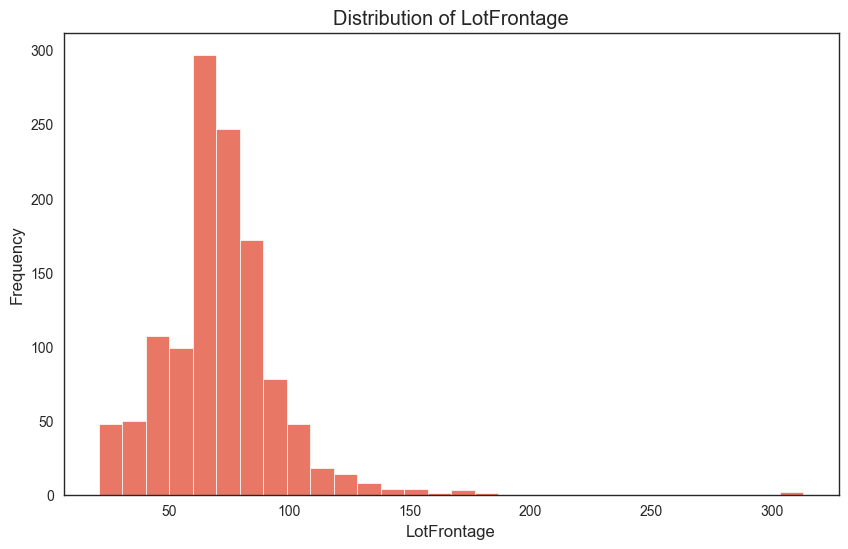

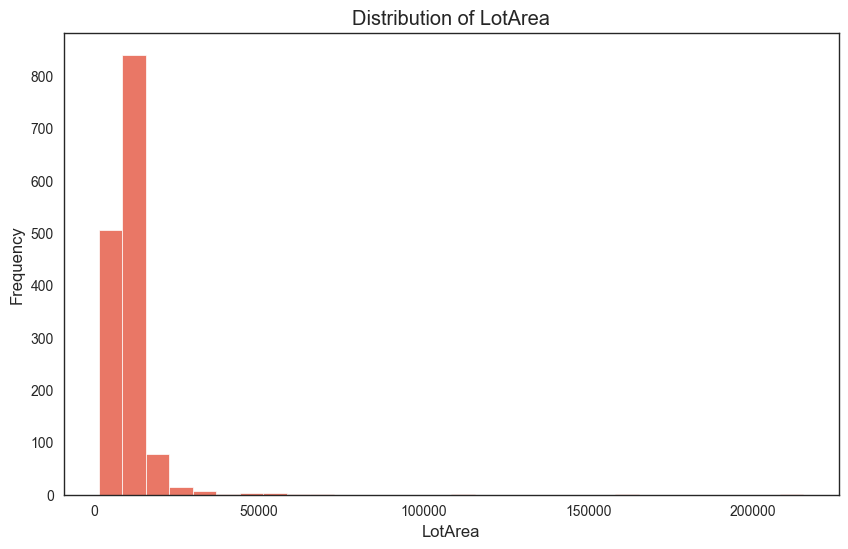

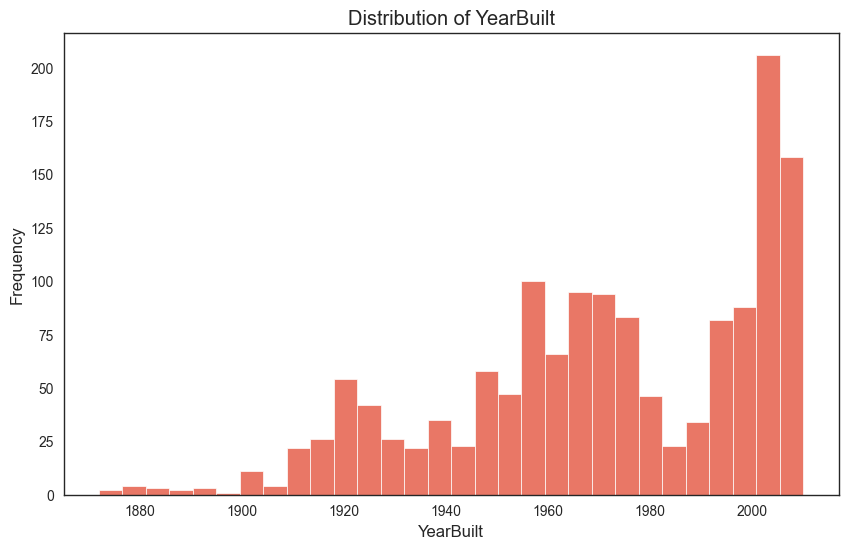

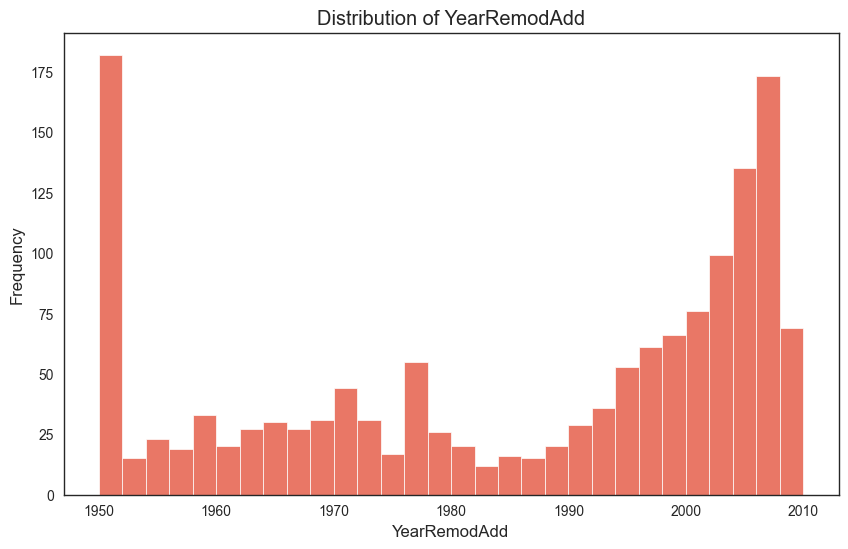

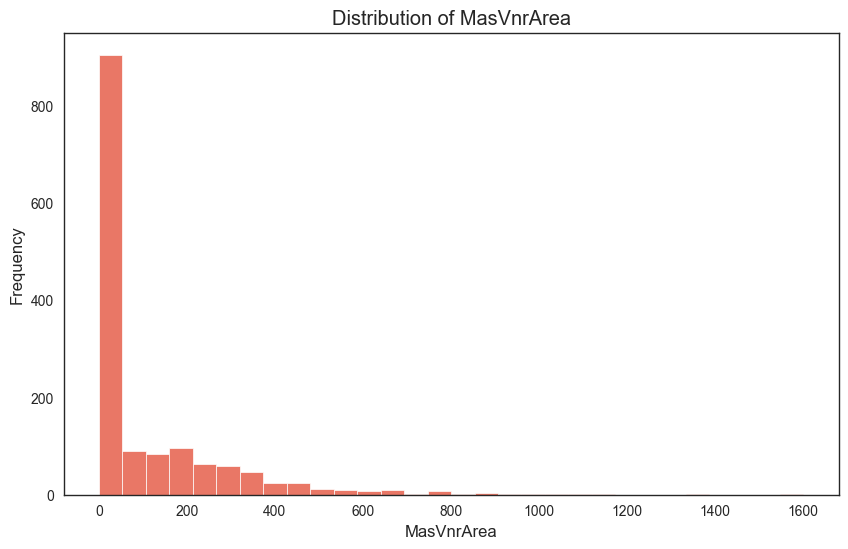

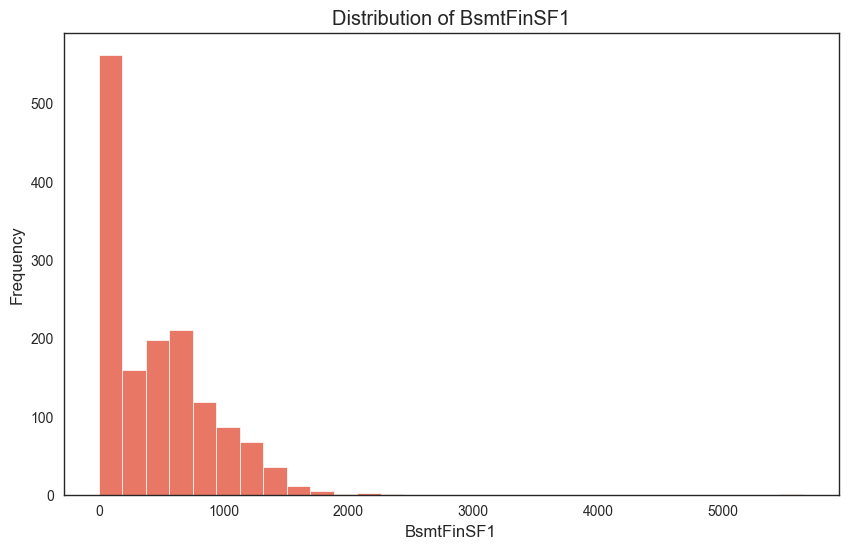

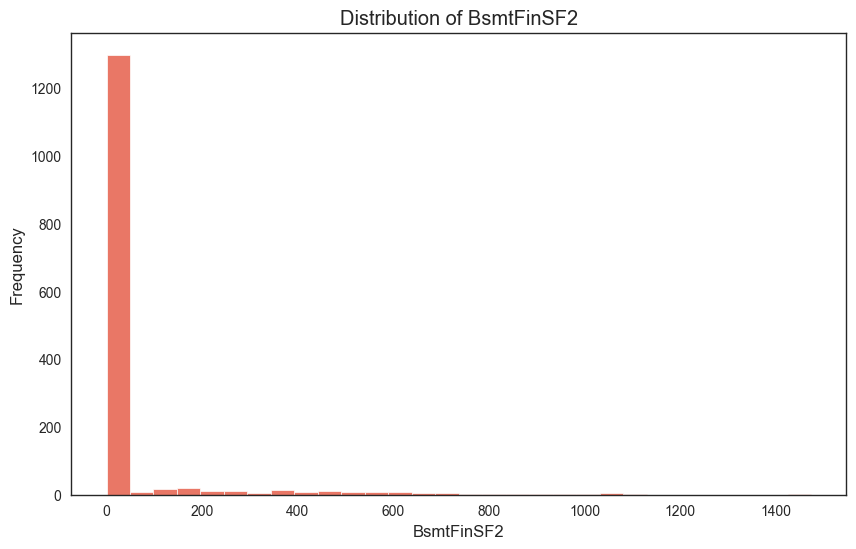

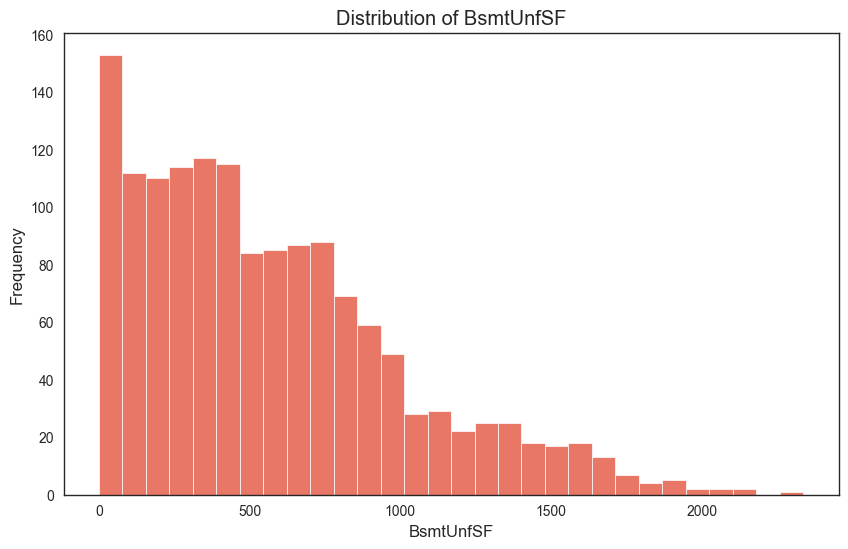

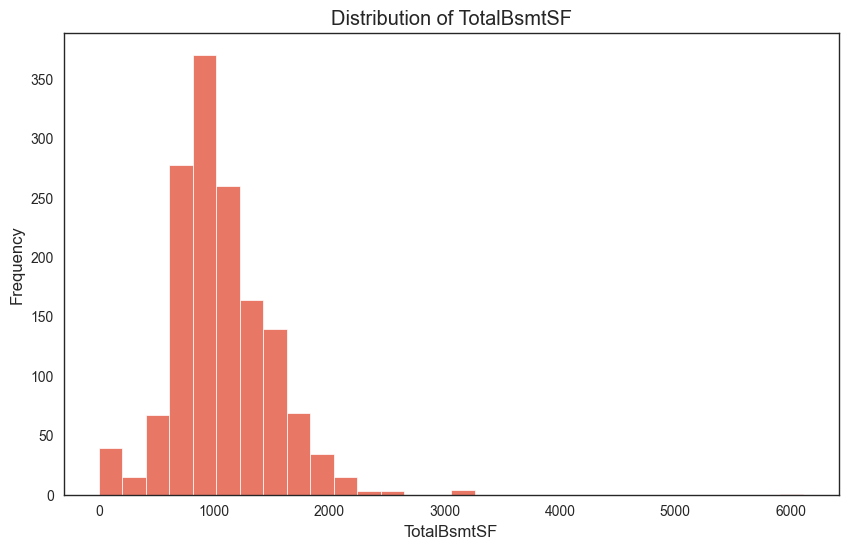

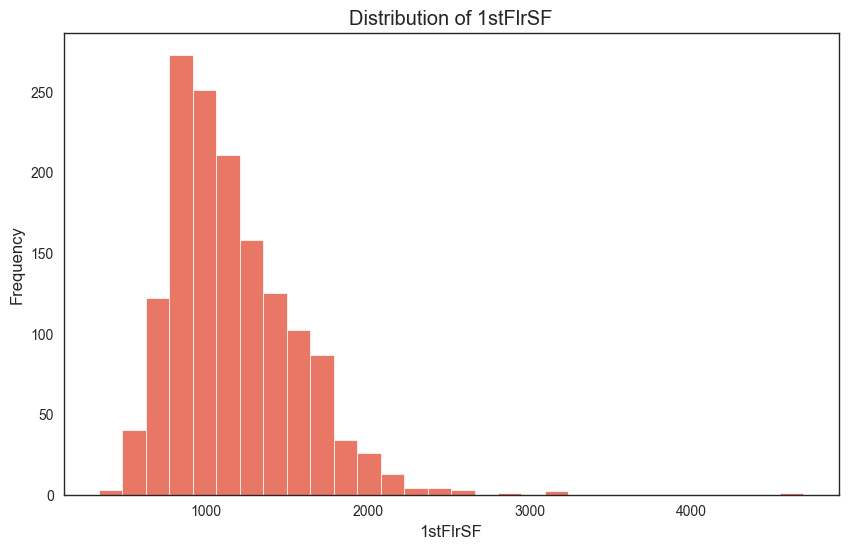

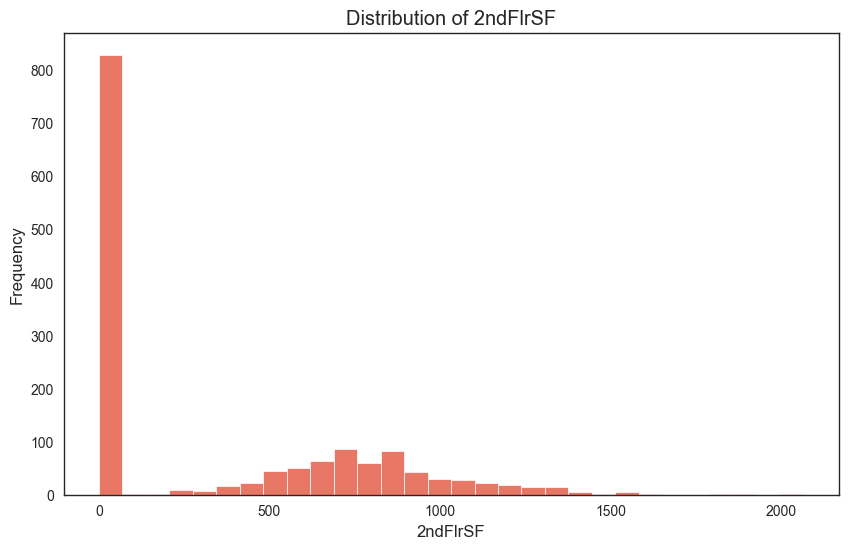

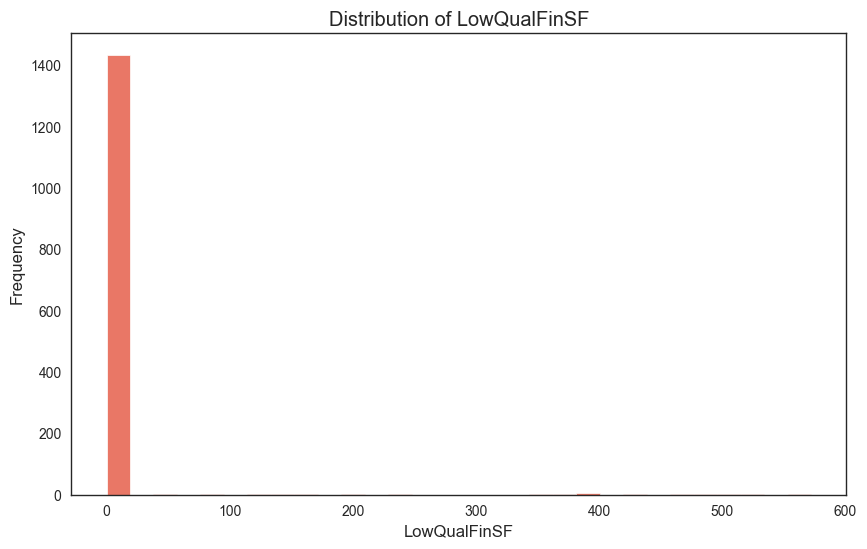

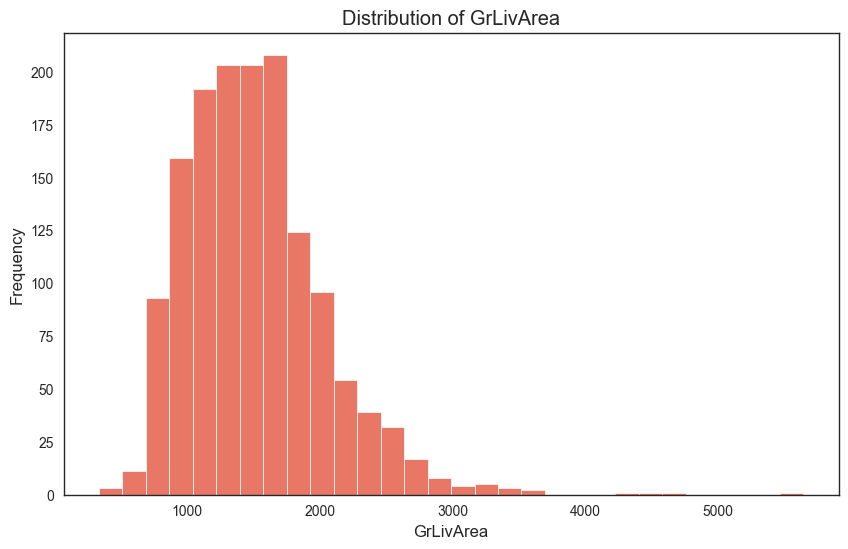

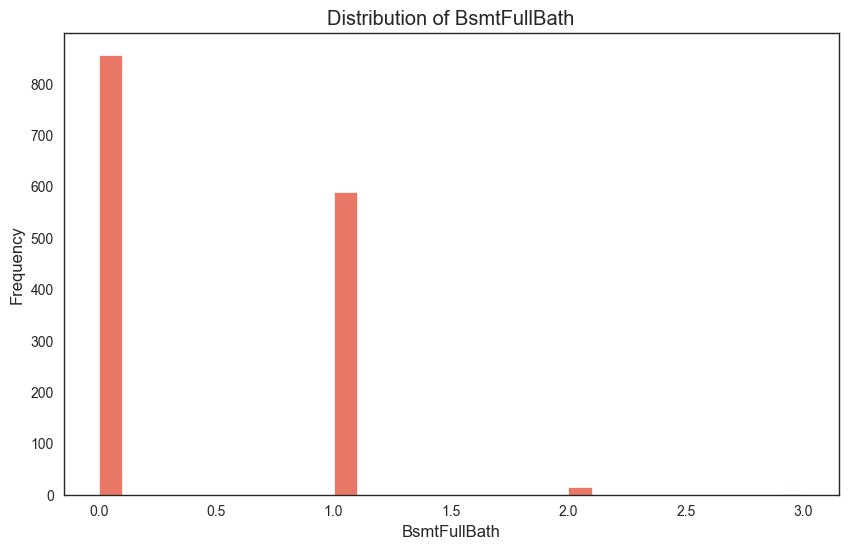

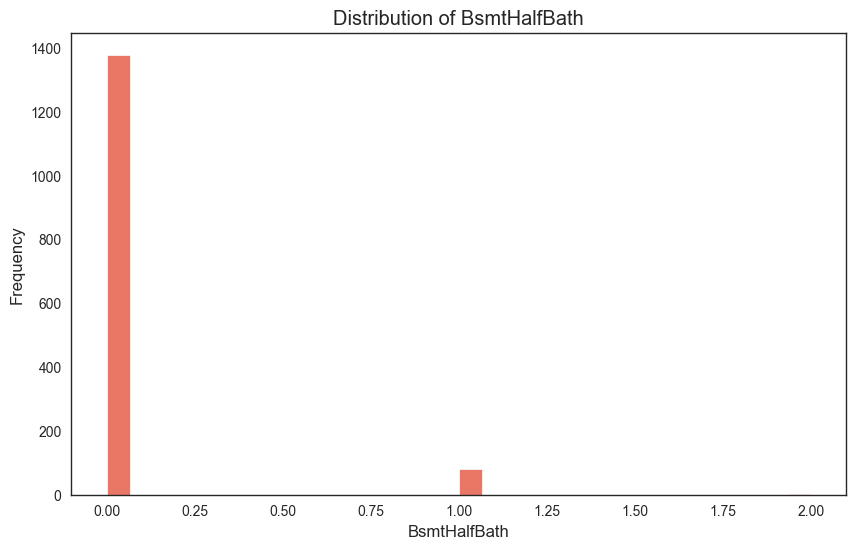

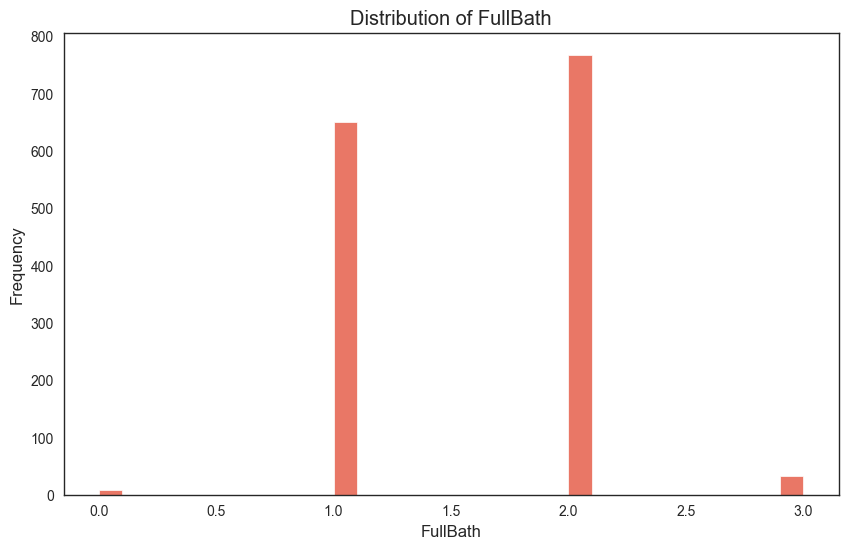

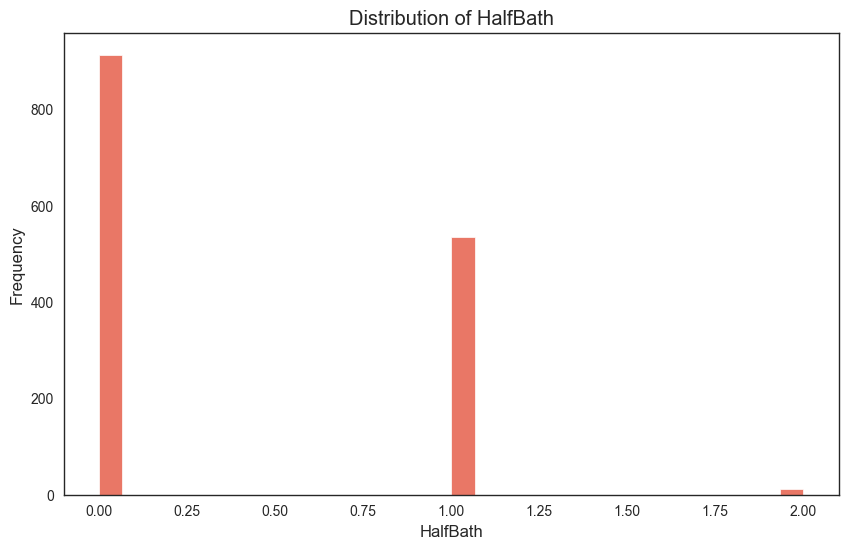

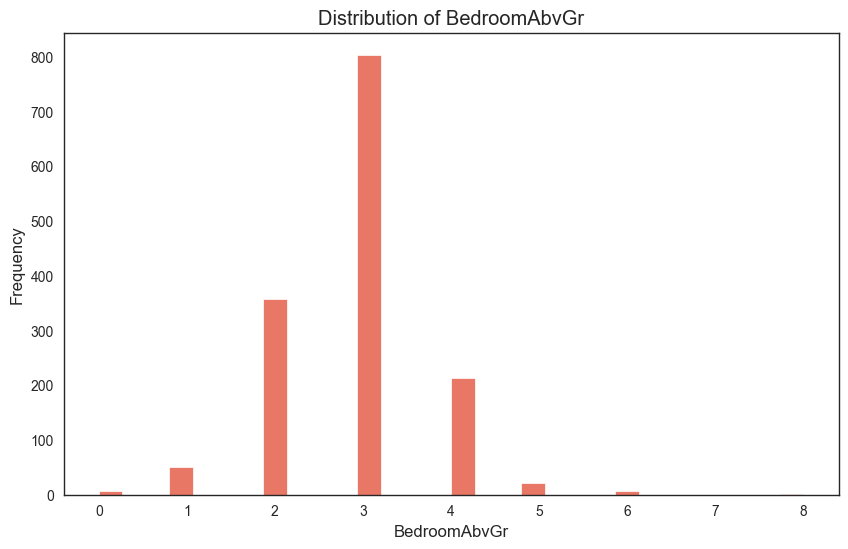

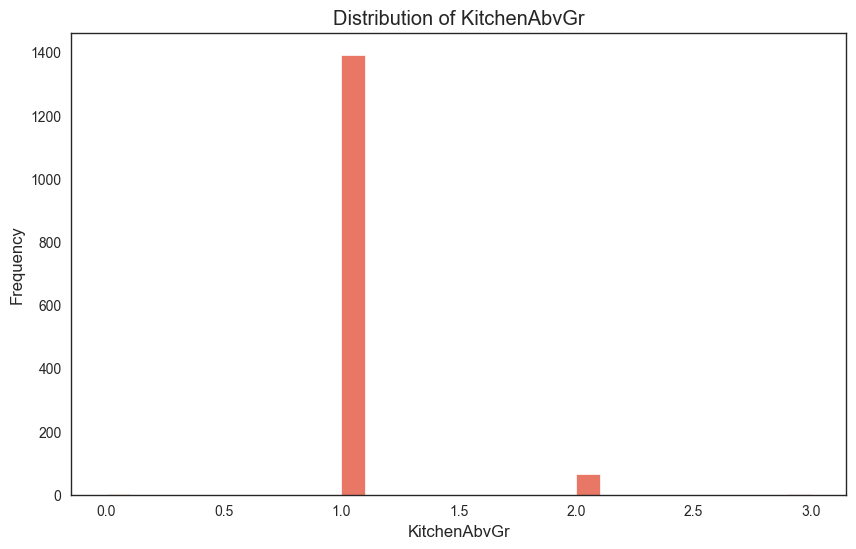

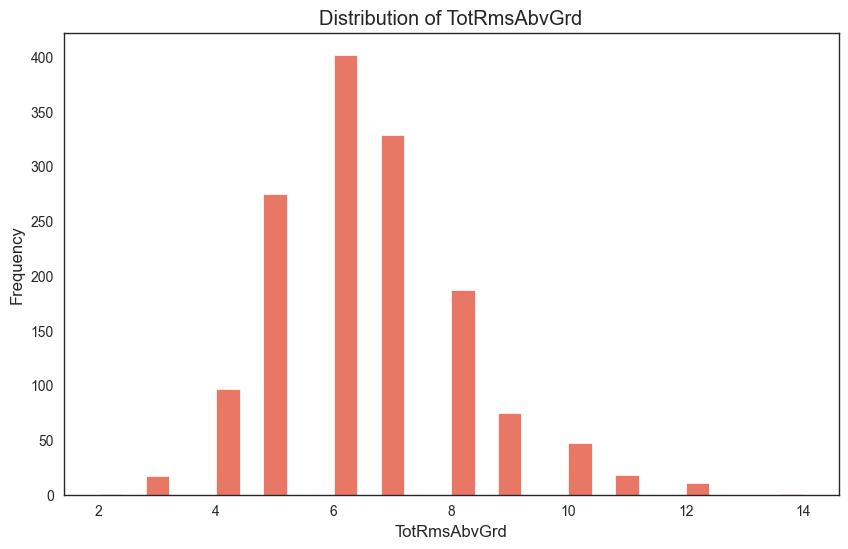

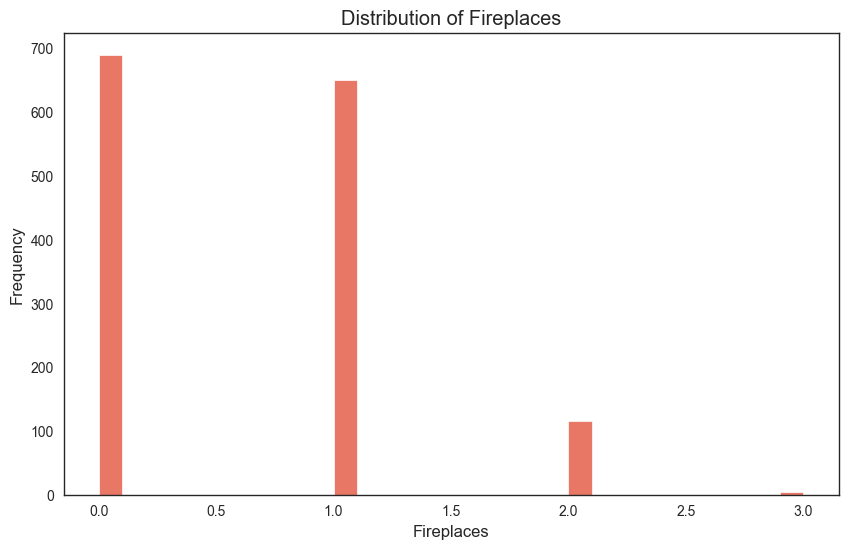

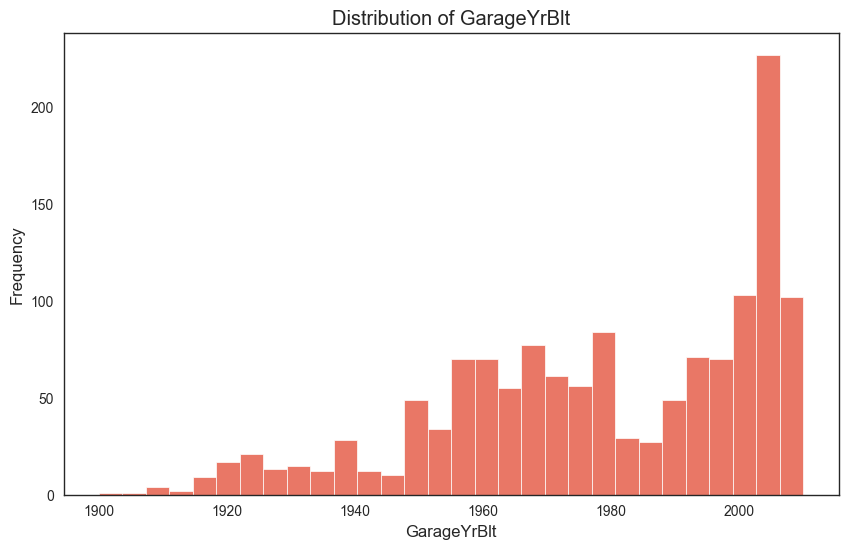

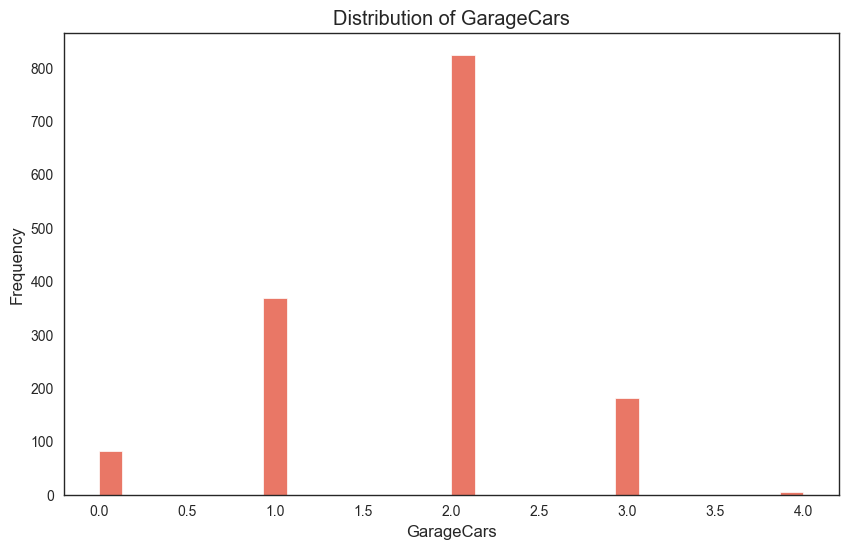

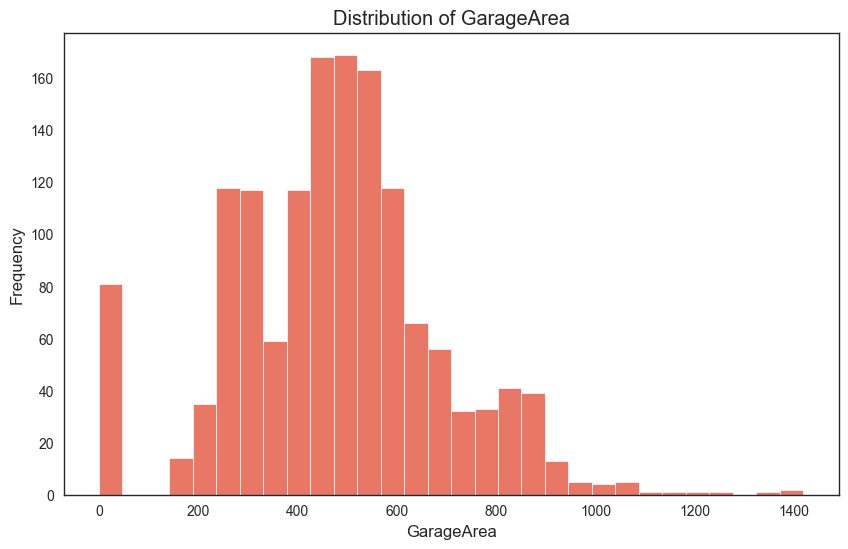

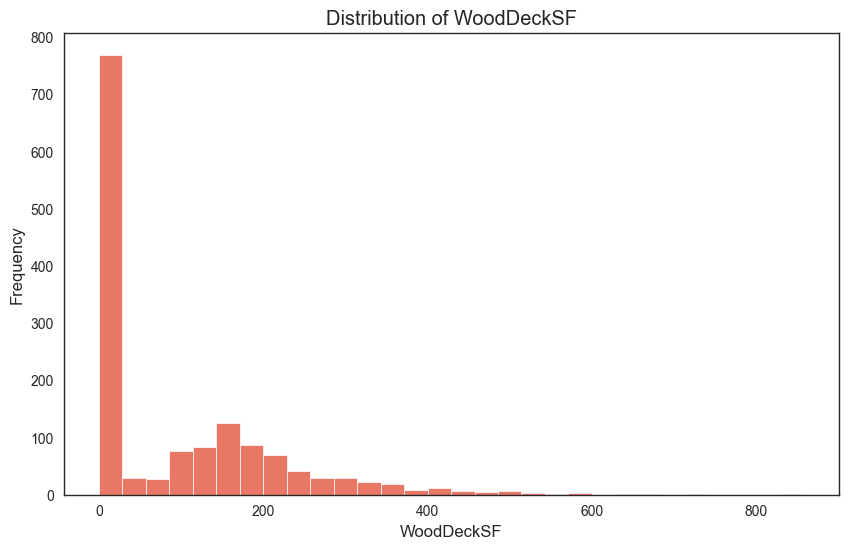

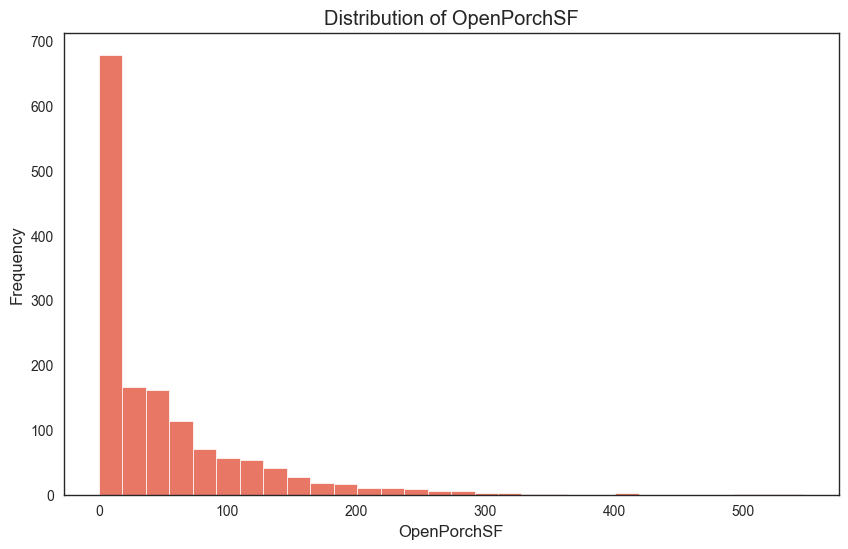

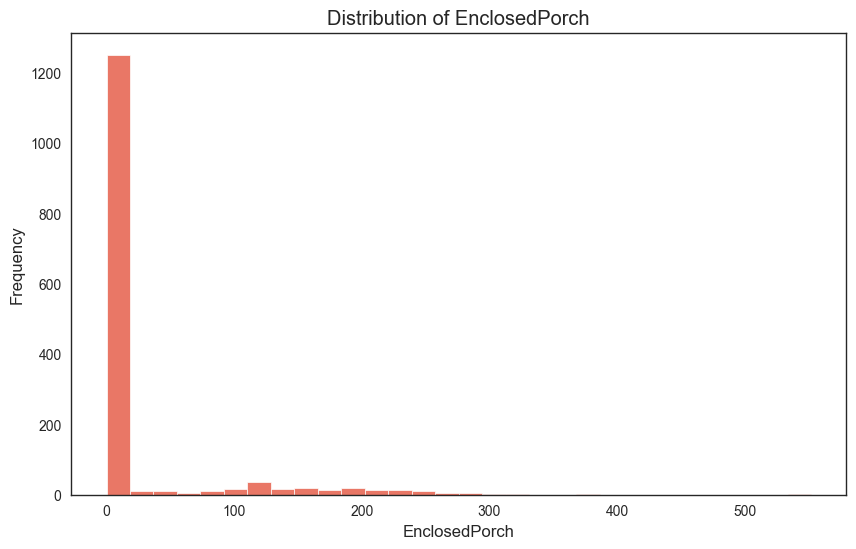

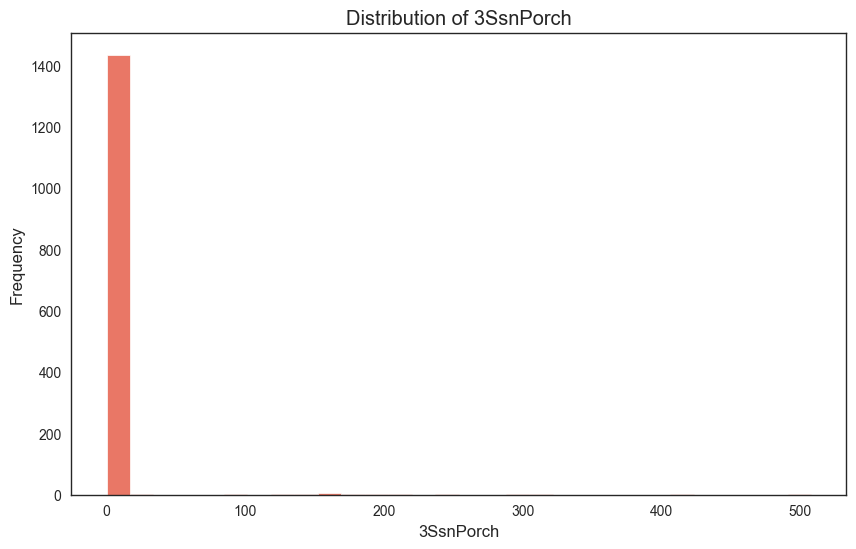

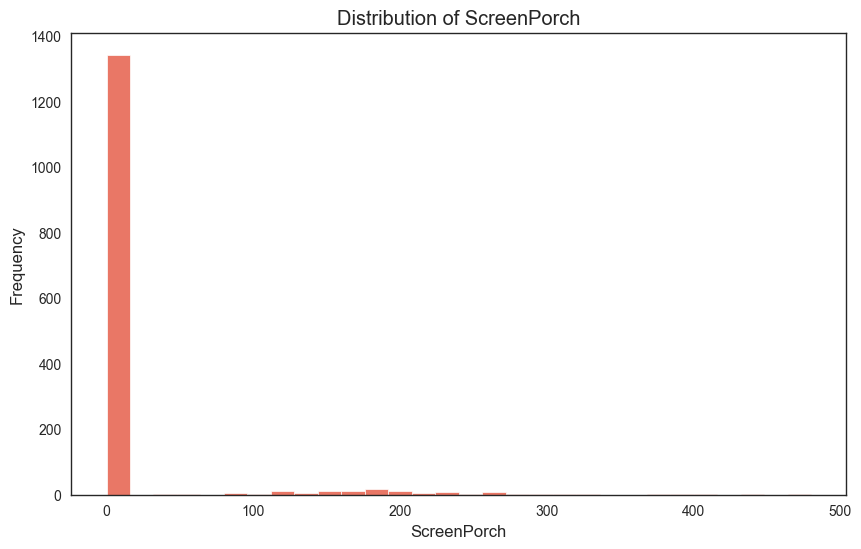

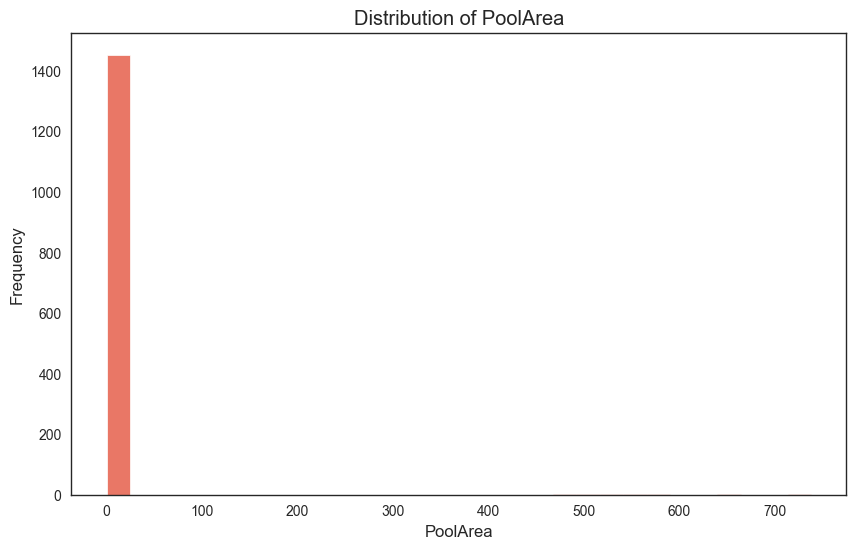

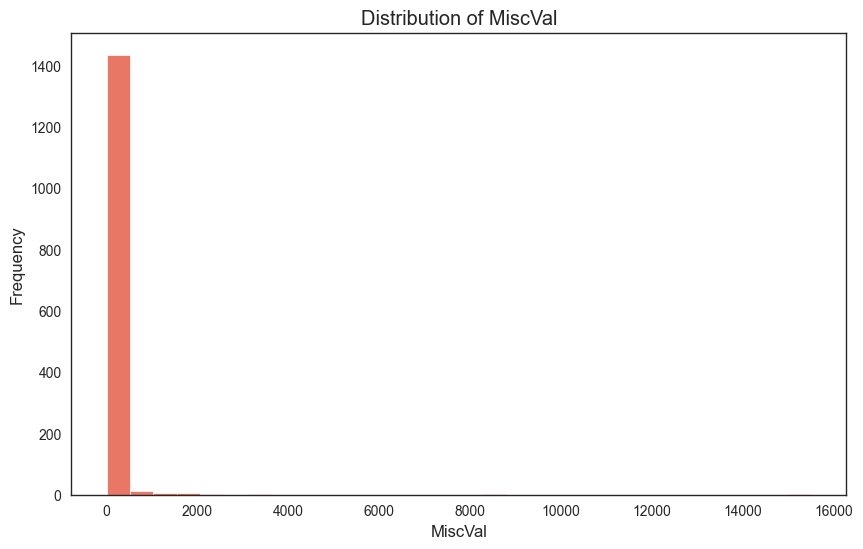

In [7]:
numerical_columns = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal"
]

time_columns = ["MoSold", "YrSold"]
num_and_time = time_columns + numerical_columns
categorical_columns = [item for item in data_raw.columns if item not in num_and_time]
print(len(categorical_columns) + len(num_and_time))
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_raw[column], bins=30, kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



In [62]:
median_imputation = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "GarageCars",
    "GarageArea",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtUnfSF",
    "GarageYrBlt",
]
zero_imputation = [
    "BsmtFinSF2",
    "2ndFlrSF",
    "LowQualFinSF",
    "BsmtFullBath",
    "BsmtHalfBath",
    "Fireplaces",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal"
]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=50, random_state=0)
for dataset in data_cleaner:
    for column in numerical_columns:
        X = dataset[[column]]
        dataset[[column]] = imputer.fit_transform(X)


print(data_cleaner[0].isnull().sum().sort_values(ascending=False))







Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [54]:
most_nulls = data_cleaner[0].isnull().sum().sort_values(ascending=False)
from mlxtend.preprocessing import minmax_scaling
from scipy import stats


for dataset in data_cleaner:
    dataset[numerical_columns] = minmax_scaling(dataset[numerical_columns], columns=numerical_columns)
    dataset[numerical_columns] += 1e-6
    for column in numerical_columns:
        dataset[column], _ = stats.boxcox(dataset[column])
        





                
            




All columns in 'numerical_columns' are numerical.
